Author: Prabin

In this notebook, we are going to learn how to build ANN with PyTorch. But you will also be introduced to PyTorch if you are new to it.

# PyTorch Basics:

* PyTorch is a deep learning framework that's well maintained and designed for building and training models. Many scientists prefer PyTorch over Tensorflow to carry out researchs. PyTorch has so much in common with the Python library Numpy.

* PyTorch Module can be imported using `import torch`. For various data, PyTorch supports:
  1. torchvision for image data
  2. torchaudio for audio data
  3. torchtext for text data

* Tensor is the fundamental data structure in PyTorch.

Lets create a tensor from list and from a numpy array.

In [2]:
import numpy as np
import torch

In [3]:
# tensor from list
lst = [[1,2,3],[4,5,6]]
tensor1 = torch.tensor(lst)
print(tensor1)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [4]:
# tensor from a numpy array
array1 = np.array(lst)
tensor2 = torch.tensor(array1)
tensor3 = torch.from_numpy(array1)
print(tensor2)
print(tensor3)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 2, 3],
        [4, 5, 6]])


The shape of the tensor and the datatype can be checked as:


In [5]:
tensor1.shape

torch.Size([2, 3])

In [6]:
tensor1.dtype

torch.int64

The command `tensor.device` displays which devicee the tensor is loaded on such as CPU or GPU.

In [7]:
tensor1.device

device(type='cpu')

## Some SImple Operations: (Optional)
We may neecd to perform various simple operations in tensors instead of Numpy arrays for the consistency of our code base. So lets be familiar with some operations. You may skip to the ANN implementation directly if you are already familiar with these operations.

1. Absolute value and Negative values

In [8]:
initial = torch.tensor([-1,2,-9])
print(initial)

positive = torch.abs(initial)
print(positive)
negation = torch.neg(initial)
print(negation)

tensor([-1,  2, -9])
tensor([1, 2, 9])
tensor([ 1, -2,  9])


2. Random number generation:

`torch.randn` Returns a tensor filled with random numbers from a normal distribution

In [9]:
a = torch.randn(3,2)
a

tensor([[ 0.1491, -1.6488],
        [ 0.1502,  0.1241],
        [ 0.9275, -0.0455]])

Try running the above cell 3 times. What did you see?
You must have noticed that the tensor changed 3 times.

For reproducibility purpose, we may need to be able to produce same set of random numbers when the experiment is to be repeated in the future. So we use `manual_seed`.
Now run the following cell 3 times and check if the same random numbers are produced each time.

In [10]:
torch.manual_seed(42)
random_fixed = torch.randn(3,2)
random_fixed

tensor([[ 0.3367,  0.1288],
        [ 0.2345,  0.2303],
        [-1.1229, -0.1863]])

3. Arithmetic Operation:

`torch.add` adds the scalar other to each element of the input and returns a new resulting tensor.
Similarly, `torch.sub` does the subtraction, `torch.mul` does the multiplication, and `torch.div` does the division.

In [11]:
print(a)
add = torch.add(a,20)
print(add)
sub = torch.sub(a,20)
print(sub)
mul = torch.mul(a,2)
print(mul)
div = torch.div(a,10)
print(div)

tensor([[ 0.1491, -1.6488],
        [ 0.1502,  0.1241],
        [ 0.9275, -0.0455]])
tensor([[20.1491, 18.3512],
        [20.1502, 20.1241],
        [20.9275, 19.9545]])
tensor([[-19.8509, -21.6488],
        [-19.8498, -19.8759],
        [-19.0725, -20.0455]])
tensor([[ 0.2983, -3.2976],
        [ 0.3004,  0.2482],
        [ 1.8550, -0.0909]])
tensor([[ 0.0149, -0.1649],
        [ 0.0150,  0.0124],
        [ 0.0928, -0.0045]])


4. Multiplication
 * Element-wise multiplication using `*`
 * Squaring is also element-wise
 * Matrix multiplication using `@`

In [12]:
element_multiplication = tensor1 * tensor2                                # element wise multiplication
print("tensor1* tensor2 = \n",element_multiplication, sep='')

print("\n", "a =", a, "\n")
square = torch.square(a)                                                  # squaring elements
print("a squared= ",square)

tensor1* tensor2 = 
tensor([[ 1,  4,  9],
        [16, 25, 36]])

 a = tensor([[ 0.1491, -1.6488],
        [ 0.1502,  0.1241],
        [ 0.9275, -0.0455]]) 

a squared=  tensor([[2.2244e-02, 2.7185e+00],
        [2.2557e-02, 1.5403e-02],
        [8.6027e-01, 2.0658e-03]])


In [13]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[1,1],[1,1]])
print(x)
print(y)
matrix_multiplication = x @ y                        # Matrix multiplication
print(matrix_multiplication)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 1],
        [1, 1]])
tensor([[3, 3],
        [7, 7]])


5. Reciprocal

In [14]:
b = torch.tensor([1,2,5,10])
print(torch.reciprocal(b))

tensor([1.0000, 0.5000, 0.2000, 0.1000])


6. Remainder

In [15]:
print(b)
remainder = torch.remainder(b,3)
print(remainder)

tensor([ 1,  2,  5, 10])
tensor([1, 2, 2, 1])


### Autograd in PyTorch:

Autograd is a feature in PyTorch that for rapid computation of multiple partial derivatives (also referred to as gradients) over a complex computation. The power of autograd comes from the fact that it traces your computation graph dynamically at runtime meaning that if your model has decision branches, or loops whose lengths are not known until runtime, the computation will still be traced correctly, and you'll get correct gradients to drive learning.

A machine learninig model can be defined as:

$\vec{y} = \vec{M}(\vec{x})$

where,

$\vec{x}$ = *i*-dimensional vector $\vec{x}$

$\vec{M}$ = Vector-valued function (function that outputs a vector $\vec{y}$, and not a scalar)

\

Meanwhile, The Loss function L($\vec{y}$) = L($\vec{M}$($\vec{x}$)) is a single-valued scalar function of the model's output because it produces a single scalar value.

Now, we want to minimize the loss function-perhaps make it go towards zero. That is we need to make its first derivative with respect to the input equal to 0:

$\frac{\partial L}{\partial x} = 0$.

By the chain rule of differential calculus, we have:

$\frac{\partial {L({\vec y})}}{\partial x}$ =
$\frac{\partial L}{\partial y} . \frac{\partial y}{\partial x}$ =
$\frac{\partial L}{\partial y} . \frac{\partial M(x)}{\partial x}$

Now $\frac{\partial L}{\partial y} . \frac{\partial M(x)}{\partial x}$ contains many local partial derivatives over every multiplied learning
weight, every activation function, and every other mathematical
transformation in the model. Every computed tensor in your PyTorch
model carries a history of its input tensors and the function used to
create it. Combined with the fact that PyTorch functions meant to act on
tensors each have a built-in implementation for computing their own
derivatives, this greatly speeds the computation of the local
derivatives.

\

For a function $\vec{y}=f(\vec{x})$, with n-dimensional input and m-dimensional output, the complete gradient is a matrix of the derivative of every output with respect to every input, called the **Jacobian:**

$$\begin{aligned}
J
=
\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
\vdots & \ddots & \vdots\\
\frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)
\end{aligned}$$

A second function, $l=g\left(\vec{y}\right)$ that takes m-dimensional input and produces a scalar output (like a loss function),  you can express its gradients with respect to $\vec{y}$ as a column vector,
$v=\left(\begin{array}{ccc}\frac{\partial l}{\partial y_{1}} & \cdots & \frac{\partial l}{\partial y_{m}}\end{array}\right)^{T}$


Now imagine 'J' is the PyTorch model, and 'v' is the loss function, now they can be multiplied to obtain the required column matrix, which contains the gradient of Loss with respect to inputs. Thats all we want!!


$$\begin{aligned}
J^{T}\cdot v=\left(\begin{array}{ccc}
\frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{1}}\\
\vdots & \ddots & \vdots\\
\frac{\partial y_{1}}{\partial x_{n}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
\end{array}\right)\left(\begin{array}{c}
\frac{\partial l}{\partial y_{1}}\\
\vdots\\
\frac{\partial l}{\partial y_{m}}
\end{array}\right)=\left(\begin{array}{c}
\frac{\partial l}{\partial x_{1}}\\
\vdots\\
\frac{\partial l}{\partial x_{n}}
\end{array}\right)
\end{aligned}$$


**torch.autograd** is an engine for computing these products.
This is how we accumulate the gradients over the learning weights during
the backward pass.

Note that the `backward()` call can *also* take an optional
vector input. This vector represents a set of gradients over the tensor,
which are multiplied by the Jacobian of the autograd-traced tensor that proceeds it.

Lets check with few examples..

In [17]:
import matplotlib.ticker as ticker
import math
import torch
import matplotlib.pyplot as plt

In [138]:
a = torch.linspace(0.0, 10.0, steps=20, requires_grad=True)
print(a)

tensor([ 0.0000,  0.5263,  1.0526,  1.5789,  2.1053,  2.6316,  3.1579,  3.6842,
         4.2105,  4.7368,  5.2632,  5.7895,  6.3158,  6.8421,  7.3684,  7.8947,
         8.4211,  8.9474,  9.4737, 10.0000], requires_grad=True)


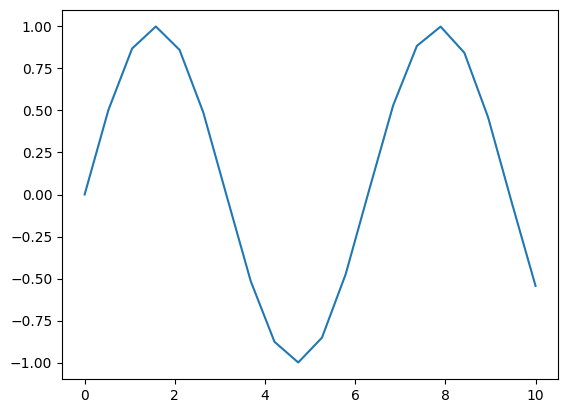

In [139]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

* Upon printing b, we can see that the computation history of b is being tracked
* For backpropagation to be successful, we need to compute gradient, and for that we need to calculate the derivate of exp(x). This is shown when we print `grad_fn`

In [140]:
print(b)
print("\n")
print(b.grad_fn)

tensor([ 0.0000,  0.5024,  0.8687,  1.0000,  0.8605,  0.4882, -0.0163, -0.5164,
        -0.8767, -0.9997, -0.8521, -0.4739,  0.0326,  0.5303,  0.8844,  0.9992,
         0.8435,  0.4595, -0.0489, -0.5440], grad_fn=<SinBackward0>)




Lets expand the computation graph by compputing some more simple arithmetics. The tensor 'out' will contain the scalar value.

In [141]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000,  1.0047,  1.7375,  1.9999,  1.7211,  0.9764, -0.0326, -1.0328,
        -1.7534, -1.9994, -1.7042, -0.9478,  0.0652,  1.0605,  1.7688,  1.9983,
         1.6870,  0.9190, -0.0978, -1.0880], grad_fn=<MulBackward0>)
tensor([ 1.0000,  2.0047,  2.7375,  2.9999,  2.7211,  1.9764,  0.9674, -0.0328,
        -0.7534, -0.9994, -0.7042,  0.0522,  1.0652,  2.0605,  2.7688,  2.9983,
         2.6870,  1.9190,  0.9022, -0.0880], grad_fn=<AddBackward0>)


In [142]:
out = d.sum()
print(out)

tensor(26.2824, grad_fn=<SumBackward0>)


We can use `grad_fn` to know how the current tensor came to be from the penultimate tensor. Also each grad_fn allows us to traverse the entire history with `next_functions`. Lets do so for "d" tensor.

In [143]:
print(d.grad_fn)                                                                                   # how d came to be  (by addition)
print(d.grad_fn.next_functions)                                                                    # (mult)
print(d.grad_fn.next_functions[0][0].next_functions)                                               # (exp)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)                          # (gradient accumulated at leaf)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

((<MulBackward0 object at 0x7b6bf21db610>, 0), (None, 0))
((<SinBackward0 object at 0x7b6bf24b1540>, 0), (None, 0))
((<AccumulateGrad object at 0x7b6bf21d9ba0>, 0),)
()


In [144]:
b.grad_fn.next_functions

((<AccumulateGrad at 0x7b6bf21da140>, 0),)

Lets call the **backward()** method on the output to get the gradients. To check the gradients with respect to inputs, we can simply use the **grad** attribute. Keep in mind that gradient is computed wrt leaf node. Here leaf node is a. Infact, PyTorch computes the gradients of out with respect to all the tensors that have "requires_grad=True"` and were involved in its computation.

To obtain the gradients of intermediate tensors like b or c, you need to call .`retain_grad()` on them. This tells PyTorch to retain their gradients during the backward pass.

In [145]:
# Retain gradients for intermediate tensors
b.retain_grad()
c.retain_grad()

# Perform backward pass
out.backward()             # if retain_graph parameter is set to false, can't call the same backward method on output twice without supplying the inputs(without making a computational graph once again)


In [146]:
a.grad

tensor([ 2.0000,  1.7293,  0.9906, -0.0163, -1.0188, -1.7455, -1.9997, -1.7127,
        -0.9621,  0.0489,  1.0467,  1.7612,  1.9989,  1.6957,  0.9334, -0.0815,
        -1.0743, -1.7764, -1.9976, -1.6781])

In [147]:
b.grad

tensor([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2.])

In [148]:
c.grad

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])

Recall our overall computation:

* a = torch.linspace(0., 2. * math.pi, steps=20, requires_grad=True)
* b = torch.sin(a)
* c = 2 * b
* d = c + 1
* out = d.sum()

Please run a simple calculation on your copy (or head):

* Gradient of out with respect to (wrt) d = 1
* Gradient of d wrt c = 1
* Gradient of c wrt b = 2
* Gradient of b wrt a = cos(a)

**Thus the derivative of out wrt a should be 2cos(a)**

Now lets plot the gradient with respect to input and see if it's $2*\cos(a)$.
Looking at the graph below, that's just what we see. So the calculation is correct.

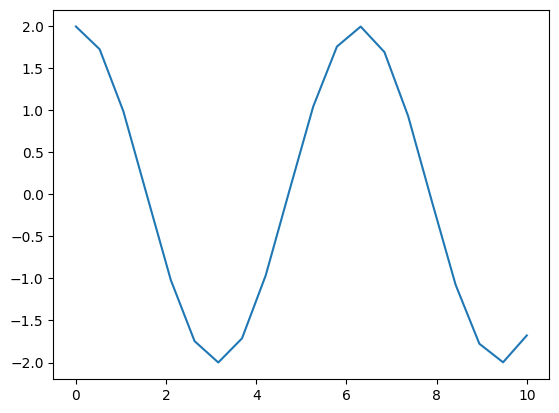

In [149]:
plt.plot(a.detach(), a.grad.detach())    # matplotlib requires numpy (=  tensor.detach )

# ANN Implementation:
Now that we know PyTorch is very similar to Numpy, let's get started with the actual motive of this notebook.

### Learning Objectives:
Here you will learn:
* How to define a model with stack of multiple linear layers
* How to define a dataloader, loss criterion, and optimizer
* How to write a training loop with:
  * Forward pass
  * Computation of loss
  * Computation of gradients
  * Updating the parameters by the optimizer

\

#### **First we we will begin with the detail implementation of all the minor steps. Then we will jump into the standard pipeline**

## Building Network Architecture:
Lets begin by building neural network architecture.
The architecture looks something like this:


<center>
<img src="https://drive.google.com/uc?export=view&id=18Z0NofFLsTIxW4zBdILxcMEczhd113c4" alt="ANN" height="550" width="650">

Figure 1: Neural Network with two hidden layers
</center>

In the above figure, the layers with the number of neurons are:
* First layer = 10 neurons
* Second layer = 16 neurons
* Third layer = 8 neurons
* Fourt layer = 1 neuron


**Note**: It is important to note that the term `layer` can create some confusion due to hasty use of words in different situations. It may refer to any of the following:

1. The set of neurons at a specific depth in the network.
2. The computational transformation (connections and operations) applied to the inputs to produce the outputs.

We referred to the first point in the above figure, when we talked about adding the number of neurons at each layer.
In PyTorch, the word layer (or linear layer) refers to the second point. That is, the first linear layer refer to the transformation between the input layer and the first hidden layer. The second linear layer is the connection between first hidden layer and second hidden layer, and so on.

Here,`torch.nn.Linear(in_features, out_features)` defines a fully connected layer (also known as a dense layer), which specifies the transformation from in_features to out_features. So, when you see torch.nn.Linear(10, 16), it means:

  * There are 10 input features (neurons in the previous layer).
  * There are 16 output features (neurons in the next layer).

In [16]:
import torch
import torch.nn as nn

In [17]:
linear1 = nn.Linear(10,16)
print(linear1)

linear2 = nn.Linear(16,8)
print(linear2)

linear3 = nn.Linear(8,1)
print(linear3)

Linear(in_features=10, out_features=16, bias=True)
Linear(in_features=16, out_features=8, bias=True)
Linear(in_features=8, out_features=1, bias=True)


### Forward Pass (manually):
At each linear layer, the computation `[w].[X] + b` is done.

In PyTorch, this is done by `w @ X + b`

Lets create an input and pass it to the first dense layer to see the intermediate output (of the first dense layer) for ourselves.

In [18]:
torch.manual_seed(42)
input1 = torch.randn(10)   # input to the model (fixed set of random numbers for reproducibility)
input1

tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
         0.4617,  0.2674])

In [19]:
print("Input to linear1:\n",input1, sep = '')

output1 = linear1(input1)                           # input fed to the first dense layer
print("\nOutput of linear1:\n",output1, sep = '')

Input to linear1:
tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
         0.4617,  0.2674])

Output of linear1:
tensor([-0.4508,  0.2718, -0.0172,  0.0688,  0.2971, -0.2571,  0.3474, -0.7919,
        -0.3481,  0.0846, -0.2356,  0.7046,  0.6394,  0.7833,  0.3670,  0.2439],
       grad_fn=<ViewBackward0>)


In [20]:
print("Shape of input:", input1.shape)
print("Shape of output:", output1.shape)

Shape of input: torch.Size([10])
Shape of output: torch.Size([16])


Similarly, lets pass the output1 as input to linear2, then lets pass the output of linear2 as input to linear3.

In [21]:
output2 = linear2(output1)
print(output2)
print(output1.shape)
print(output2.shape)

print("\n")

output3 = linear3(output2)
print(output3)
print(output2.shape)
print(output3.shape)

tensor([ 0.1445,  0.3474,  0.4835,  0.2445, -0.1360, -0.2979,  0.1422,  0.0023],
       grad_fn=<ViewBackward0>)
torch.Size([16])
torch.Size([8])


tensor([-0.5047], grad_fn=<ViewBackward0>)
torch.Size([8])
torch.Size([1])


### Forward Pass (Model instantiation):
Voila! We just completed a forward pass by manually writing the code by specifying inputs to each neuron for each layers. (Here `input1` is the input to the model and `output3 = 0.3403` is the final output of the model.) However, our approach was exhausting. Luckily, PyTorch offers a solution.

Instead, lets stack all the layers in a single place using `nn.Sequential`. This way we can instantiate our model as a black box instead of manually specifying the inputs for each neurons.

In [22]:
 # layer1, layer2, layer3 are already defined above, so we can stack directly

model = nn.Sequential(linear1, linear2, linear3)   # instantiation as "model"
model

Sequential(
  (0): Linear(in_features=10, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=1, bias=True)
)

Now lets suppy the same input to the model and check if the output obtained will be same.

In [23]:
model_output = model(input1)
print(model_output)
print(model_output.shape)

tensor([-0.5047], grad_fn=<ViewBackward0>)
torch.Size([1])


Here, we can see that `output3 = model_output = 0.3403`

### With Activation function:
Until now, the model is simple, it is not able to properly learn non-linearity. Lets add activation function to the model. There are various activation functions, but they shall not be discussed here.

Lets instantiate a different model named `model2` that has activation functions as well.  Lets change the architecture just a little bit so that there are 2 neurons in the output layer as well.

In [24]:
linear1 = nn.Linear(10,16)
linear2 = nn.Linear(16,8)
linear3 = nn.Linear(8,2)

model2 = nn.Sequential(
    linear1,
    nn.LeakyReLU(0.02),
    linear2,
    nn.Sigmoid(),
    linear3,
    nn.Softmax(dim = -1)
)
model2

Sequential(
  (0): Linear(in_features=10, out_features=16, bias=True)
  (1): LeakyReLU(negative_slope=0.02)
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=8, out_features=2, bias=True)
  (5): Softmax(dim=-1)
)

In [25]:
output_of_model = model2(input1)
print(output_of_model)

print("The output class is ", torch.argmax(output_of_model))

tensor([0.4489, 0.5511], grad_fn=<SoftmaxBackward0>)
The output class is  tensor(1)


Here, we have modified 'model2' from 'model' just a little bit so that the output layer has 2 neurons. Softmax is applied to the outermost layer so that the raw logits is converted into probabilites.

Sigmoid function is a good activation function that squeezes the numbers in a range [0,1]. This is suitable for binary classification problem by thresholding the output at a certain value (like 0.5 can be chosen as a threshold and numbers below 0.5 are negative class while numbers above 0.5 are positive class).

For multiclass classification, softmax function is used to convert the raw output logits to the probablitites of each classes, ensuring that the total sum of probabilitites is 1.

`prob = nn.Softmax(dim = -1)`

Here prob is the tensor of shape `model_output.shape` which has the probability values of a particular input belonging to the different classes.


## Backpropagation and weight updation:

### Ground Truth Creation and One-Hot Encoding:

Lets create the ground truth ourselves.

Until now, we have:
* Input = `input1` = [ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380, 0.4617,  0.2674]
* Output = `output_of_model` = [prob1, prob2]

  ( We could also say Output = torch.argmax([prob1, prob2]) = classᵢ )

Now we can create ground truth as:
* GT = `actual_output` = [actual_prob1, actual_prob2]

But often in real world dataset, the ground truth could only mention the target class instead of probabilities such as:
* GT = `actual_output` = Class 0

In such case, how do we compare `output_of_model` and `actual_output` to calculate loss function?? Here they are simply incompatible in shape!!

We can instead encode the `actual_output` in a shape similar to `output_of_model` for better comparison.

\

Lets say the output is class2. So the objective is to make it [0, 1] so that it can be compared to [prob1, prob2]

In [26]:
import torch.nn.functional as F

actual_output_class = 0

actual_output_one_hot = F.one_hot(torch.tensor(actual_output_class), num_classes=2).float()
print("One-hot encoded ground truth:", actual_output_one_hot)

One-hot encoded ground truth: tensor([1., 0.])


### Loss Function criterion:

Until now, the model has just been able to compute output without learning anything. It is not able to learn anything yet because we haven't specififed the loss function. Loss function calculates the deviation of the model output from the ground truth. Without loss function calculation, the model can't calculate how much it has deviated from the truth, thus it can't be able to determine the direction it should go to  minimize the loss.

The "direction" that model must go to minimize the loss function is given by `gradient`. Gradient is the partial derivative of loss with respect to the learnable parameters (weights and biases), so that the parameters can be updated and model can learn.

For classification task, lets choose crossentropy loss as our loss criterion.

In [27]:
criteria = nn.CrossEntropyLoss()                           # this is defined before the training loop
criteria

CrossEntropyLoss()

In [28]:
output_of_model = model2(input1)
print(output_of_model)
print(actual_output_one_hot)

tensor([0.4489, 0.5511], grad_fn=<SoftmaxBackward0>)
tensor([1., 0.])


In [29]:
loss = criteria(output_of_model, actual_output_one_hot)      # this will be done in the training loop.
loss

tensor(0.7456, grad_fn=<DivBackward1>)

In [30]:
loss.backward(retain_graph = True)

### Weights and Gradients:
We can access the parameters and gradients at each layers.

In [31]:
# Accessing parameters of specific layers
print("Linear1 weights:", model2[0].weight)
print("Linear1 biases:", model2[0].bias)

Linear1 weights: Parameter containing:
tensor([[-0.1457, -0.0371, -0.1284,  0.2098, -0.2496, -0.1458, -0.0893, -0.1901,
          0.0298, -0.3123],
        [ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
          0.0346, -0.0997],
        [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
          0.1606, -0.1927],
        [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
          0.2475, -0.2247],
        [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
         -0.1886, -0.1886],
        [ 0.2844,  0.1054,  0.3043, -0.2610, -0.3137, -0.2474, -0.2127,  0.1281,
          0.1132,  0.2628],
        [-0.1633, -0.2156,  0.1678, -0.1278,  0.1919, -0.0750,  0.1809, -0.2457,
         -0.1596,  0.0964],
        [ 0.0669, -0.0806,  0.1885,  0.2150, -0.2293, -0.1688,  0.2896, -0.1067,
         -0.1121, -0.3060],
        [-0.1811,  0.0790, -0.0417, -0.2295,  0.0074, -0.2160, -0.2683, -0.1741,
        

In [32]:
# Access the gradients of the first layer's parameters
print("Gradients of Linear1 weights:", model2[0].weight.grad)
print("Gradients of Linear1 biases:", model2[0].bias.grad)

Gradients of Linear1 weights: tensor([[-1.1016e-03, -4.2145e-04, -7.6714e-04, -7.5363e-04,  3.6739e-03,
          6.0965e-04, -7.2250e-03,  2.0875e-03, -1.5105e-03, -8.7474e-04],
        [-7.7563e-04, -2.9674e-04, -5.4013e-04, -5.3062e-04,  2.5867e-03,
          4.2924e-04, -5.0870e-03,  1.4697e-03, -1.0635e-03, -6.1589e-04],
        [ 1.8456e-04,  7.0609e-05,  1.2852e-04,  1.2626e-04, -6.1551e-04,
         -1.0214e-04,  1.2105e-03, -3.4973e-04,  2.5307e-04,  1.4655e-04],
        [ 1.1969e-05,  4.5789e-06,  8.3346e-06,  8.1878e-06, -3.9915e-05,
         -6.6235e-06,  7.8496e-05, -2.2679e-05,  1.6411e-05,  9.5037e-06],
        [-3.0357e-03, -1.1614e-03, -2.1140e-03, -2.0767e-03,  1.0124e-02,
          1.6800e-03, -1.9910e-02,  5.7524e-03, -4.1624e-03, -2.4105e-03],
        [-3.0969e-03, -1.1848e-03, -2.1566e-03, -2.1186e-03,  1.0328e-02,
          1.7139e-03, -2.0311e-02,  5.8683e-03, -4.2463e-03, -2.4591e-03],
        [-6.3868e-04, -2.4434e-04, -4.4476e-04, -4.3693e-04,  2.1300e-03,
  

### Weight updation:

We could update the weights of the first layers using the formula:

`model2[0].weight = model2[0].weight - learning_rate * model2[0].weight.grad`.

But there are various reasons we don't do so. They are:

1. PyTorch doesn't allow assigning a new tensor to a parameter.

  Thus, we can instead do this:

  `model2[0].weight -= learning_rate * model2[0].weight.grad`

2. Even though the above update works, Non-convex functions dont converge easily, so we need a proper optimizer to update the weights.

  Thus we may use one of the most popular, simple and effective optimizer called `SGD`

In [33]:
learning_rate = 0.001

In [34]:
with torch.no_grad():
    model2[0].weight -= learning_rate * model2[0].weight.grad    # updation using the above point number 1.
    model2[0].bias -= learning_rate * model2[0].bias.grad

In [35]:
# Access the gradients of the first layer's parameters
print("Gradients of Linear1 weights:", model2[0].weight.grad)
print("Gradients of Linear1 biases:", model2[0].bias.grad)

Gradients of Linear1 weights: tensor([[-1.1016e-03, -4.2145e-04, -7.6714e-04, -7.5363e-04,  3.6739e-03,
          6.0965e-04, -7.2250e-03,  2.0875e-03, -1.5105e-03, -8.7474e-04],
        [-7.7563e-04, -2.9674e-04, -5.4013e-04, -5.3062e-04,  2.5867e-03,
          4.2924e-04, -5.0870e-03,  1.4697e-03, -1.0635e-03, -6.1589e-04],
        [ 1.8456e-04,  7.0609e-05,  1.2852e-04,  1.2626e-04, -6.1551e-04,
         -1.0214e-04,  1.2105e-03, -3.4973e-04,  2.5307e-04,  1.4655e-04],
        [ 1.1969e-05,  4.5789e-06,  8.3346e-06,  8.1878e-06, -3.9915e-05,
         -6.6235e-06,  7.8496e-05, -2.2679e-05,  1.6411e-05,  9.5037e-06],
        [-3.0357e-03, -1.1614e-03, -2.1140e-03, -2.0767e-03,  1.0124e-02,
          1.6800e-03, -1.9910e-02,  5.7524e-03, -4.1624e-03, -2.4105e-03],
        [-3.0969e-03, -1.1848e-03, -2.1566e-03, -2.1186e-03,  1.0328e-02,
          1.7139e-03, -2.0311e-02,  5.8683e-03, -4.2463e-03, -2.4591e-03],
        [-6.3868e-04, -2.4434e-04, -4.4476e-04, -4.3693e-04,  2.1300e-03,
  

# Implementation Pipeline:

#### **Actual standard pipeline begins here. Until now we have just played with the PyTorch syntax to see the minor details in model building and training**

### Preprocessing and DataLoader:

Lets first load the dataset. Here we can use sklearn.datasets only to load the data.

In [36]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=5000, n_features=10, n_redundant=0, n_informative=3, n_clusters_per_class=2, n_classes=2)

In [37]:
print(X.shape)
print(y.shape)

(5000, 10)
(5000,)


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [39]:
print(np.unique(y_train))

[0 1]


In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 10)
(4000,)
(1000, 10)
(1000,)


Lets preprocess the dataset now.

Lets create a class called `CustomDataset` inheriting the properties of `torch.utils.data.Dataset`.

This class will contain various user-defined functions (methods) that carry out simple tasks that may be needed later.

In [41]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):

    # method to initialize dataset, and conversion to tensor
    def __init__(self, X_train, y_train):
        self.X = torch.from_numpy(X_train.astype(np.float32))
        self.y = torch.from_numpy(y_train).type(torch.LongTensor)
        self.len = self.X.shape[0]

    # method to return a single sample from the dataset given an index.
    def __getitem__(self, index):
        return self.X[index], self.y[index]

    # method to return the number of samples in the dataset.
    def __len__(self):
        return self.len


So what did we achieve from the above class and its methods? Nothing fancy really, lets check by accessing the sample by both methods-without and with the help of above class' method.

In [42]:
print(X_train[25])                                     # simple access

traindata = CustomDataset(X_train, y_train)
print(traindata[25])                                   # access with above class' method

[ 0.88813082 -0.72732207  1.28919598  1.27135308 -1.03232921 -1.73411435
 -0.9962748   0.19894904 -1.75137951 -0.07612058]
(tensor([ 0.8881, -0.7273,  1.2892,  1.2714, -1.0323, -1.7341, -0.9963,  0.1989,
        -1.7514, -0.0761]), tensor(1))


Now lets get to the important part of creating a dataloader. DataLoader combines a dataset and a sampler, and provides an iterable over the given dataset.

Benefits of Using DataLoader:

  * Batching: Automatically handles batching of data.
  * Shuffling: Easily shuffle data at each epoch.
  * Parallel Data Loading: Load data in parallel using multiple workers for faster data loading.

In [43]:
from torch.utils.data import DataLoader

trainloader = DataLoader(traindata, batch_size = 4)

The "trainloader" is now an `iterable` that is instantiated from DataLoader class.

What's the use? Well, instead of accessing just X_train and y_train, we can now access the training examples in batches. That means the iterable trainloader has batches of X_train and y_train.

Lets call them `batch_X` and `batch_y`. These will be used in the training loop to speed up the computation. (Remember that we used to just use X_train and y_train without batches before)

In [44]:
# Iterate through the TrainLoader

for batch_X, batch_y in trainloader:
    print(batch_X.shape, batch_y.shape)

torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Size([4])
torch.Size([4, 10]) torch.Si

### Recreating the model within a Class:

Creating a Class allows for more flexibility and is the standard practice for building models.

Remember we previously created a model called `model2` with activation functions and all? Well, lets write that architecture within a custom Class called `Network`. It inherits from the parent class nn.Module.

* The parent class must be initialized within the constructor of the child class.
* `super(Network, self).__init__()` can be used to call the constructor of the parent class.


In [45]:
class Network(nn.Module):

    # Define the layers and all in the constructor.
    def __init__(self):
        super(Network, self).__init__()  # Initialize parent class within the constructor
        self.linear1 = nn.Linear(10, 16)
        self.leaky_relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(16, 8)
        self.sigmoid = nn.Sigmoid()
        self.linear3 = nn.Linear(8, 2)
        self.softmax = nn.Softmax(dim=-1)

    # Method for forward pass
    def forward(self, x):
        x = self.linear1(x)
        x = self.leaky_relu(x)
        x = self.linear2(x)  # Pass input to the linear2 layer
        x = self.sigmoid(x)  # Pass input to the sigmoid layer
        x = self.linear3(x)  # Pass input to the linear3 layer
        x = self.softmax(x)  # Pass input to the softmax layer
        return x

Lets instantiate our model. In this approach, we can just call our custom class, and the constructor will be automatically called. The constructor has the layers, and thus the model is instantiated.

In [46]:
model3 = Network()
print(model3)

Network(
  (linear1): Linear(in_features=10, out_features=16, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
  (linear2): Linear(in_features=16, out_features=8, bias=True)
  (sigmoid): Sigmoid()
  (linear3): Linear(in_features=8, out_features=2, bias=True)
  (softmax): Softmax(dim=-1)
)


### Optimizer and Loss Functions (Definition):

Here loss function and optimizer are defined only. They are used inside the training loop when:
* `loss = criterion (target, predicted)` parameters are supplied
* `optimizer.step()` is done to update the parameters.

In [47]:
criterion = nn.CrossEntropyLoss()
print(criterion)

CrossEntropyLoss()


In [48]:
import torch.optim as optim

optimizer = optim.SGD(model3.parameters(), lr = 0.001)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


## Writing a Training Loop:

Unlike in TensorFlow, where you'd call `fit` method, you should write your own training loop in PyTorch.

Steps:
1. Set gradients to zero: `optimizer.zero_grad()`
2. Run forward pass:  `predicted = model(features)`
3. Calculate loss: `loss = criterion(target,predicted)`
4. Calculate gradients : `loss.backward()`
5. Update weights : `optimizer.step()`


### Evaluation:

6. For train loss:
  * In training loop, use `train_loss += loss.item()` and `epoch_loss = train_loss/len(trainloader)`

7. For validation loss:
  * First put model in eval mode, because some layers behave differently in validation mode. `model.eval()`
  * Set no gradient mode: `with torch.no_grad()`
  * In training loop (with validationloader), `use val_loss = loss.item()` and `epoch_loss = val_loss/len(validationloader)`
  * Set model back to train mode for next epoch: `model.train()`

8. For accuracy:
  * Use `metric = torchmetrics.Accuracy(task = "multiclass", num_class = number)`
  * In training loop, use `acc = metric(outputs, labels.argmax(dim = -1)`
  * Use `acc = metric.compute()`
  * Reset metric for next epoch: `metric.reset()`

In [49]:
num_epochs = 10
epoch_loss = []

for epoch in range(num_epochs):
  train_loss = 0
  for batch_X, batch_y in trainloader:
    optimizer.zero_grad()
    predicted = model3(batch_X)                      # forward pass in batches
    loss = criterion(predicted, batch_y)
    loss.backward()                                  # gradient calculation with help of loss
    optimizer.step()                                 # weight update

    # Evaluation example
    train_loss += loss.item()

    # After processing all batches, calculate average loss for the epoch
    average_loss = train_loss / len(trainloader)
    epoch_loss.append(average_loss)

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss}')


Streaming output truncated to the last 5000 lines.
Epoch 6/10, Loss: 0.0006925097703933716
Epoch 6/10, Loss: 0.0013859906196594237
Epoch 6/10, Loss: 0.0020798425674438477
Epoch 6/10, Loss: 0.002774678885936737
Epoch 6/10, Loss: 0.0034560810327529906
Epoch 6/10, Loss: 0.0041492058634758
Epoch 6/10, Loss: 0.004834515154361725
Epoch 6/10, Loss: 0.005528079926967621
Epoch 6/10, Loss: 0.0062104352116584775
Epoch 6/10, Loss: 0.0068897224068641665
Epoch 6/10, Loss: 0.007574898898601532
Epoch 6/10, Loss: 0.008257112324237823
Epoch 6/10, Loss: 0.00894071751832962
Epoch 6/10, Loss: 0.00963509601354599
Epoch 6/10, Loss: 0.010334896326065064
Epoch 6/10, Loss: 0.011035058856010437
Epoch 6/10, Loss: 0.011739851713180541
Epoch 6/10, Loss: 0.012412951469421387
Epoch 6/10, Loss: 0.013113734483718872
Epoch 6/10, Loss: 0.01380626618862152
Epoch 6/10, Loss: 0.014499263525009156
Epoch 6/10, Loss: 0.015191304922103882
Epoch 6/10, Loss: 0.0158888578414917
Epoch 6/10, Loss: 0.01657461380958557
Epoch 6/10, Los

## Testing the model:

Here we will test the performance of the model on the test data. First, lets save the model parameters in a `.PTH` file. We will load the saved model by opening the file, then load the test data using testloader (just like trainloader) then we will be conducting the inference.

* `torch.save(model.state_dict(), path)` to save the model

* `model.load_state_dict(torch.load(path))` to load the model

In [52]:
# save the trained model
PATH = './mymodel.pth'
torch.save(model3.state_dict(), PATH)

In [61]:
# Loading the saved model
model3 = Network()
model3.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [56]:
testdata = CustomDataset(X_test, y_test)

testloader = DataLoader(testdata, batch_size=4, shuffle=True, num_workers=2)

In [58]:
print(testdata[5])
print(testloader)

(tensor([ 0.5007, -0.8821, -0.5948, -2.0559, -1.2178, -0.1364,  1.5397,  0.2697,
         0.6762, -0.2466]), tensor(0))


In [62]:
# Function to perform inference
def test_model(model, testloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient calculation
        for batch_X, batch_y in testloader:
            outputs = model(batch_X)  # Perform forward pass
            _, predicted = torch.max(outputs, 1)  # Max probability value discarded, index obtained in predicted. [since output = (probability, class), here "class" is the index]
            total += batch_y.size(0)              # total no of samples so far
            correct += (predicted == batch_y).sum().item()     # total correct prediction so far. [(predicted==batch_y) is a boolean tensor, .sums true value in tensor, .item() converts the sum to scalar to give total true values.

    accuracy = correct / total
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

In [63]:
# Test the model
test_model(model3, testloader)

Test Accuracy: 62.60%


Reference:

Classification: [https://medium.com/analytics-vidhya/a-simple-neural-network-classifier-using-pytorch-from-scratch-7ebb477422d2]

Autograd: [https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html]

Profiler: [https://pytorch.org/docs/stable/autograd.html#profiler]

